# JAM18 Pions PDF  @ NLO

In [1]:
import sys,os
import numpy as np
import lhapdf
import pylab as py
%matplotlib inline

In [2]:
pdf=lhapdf.mkPDFs('JAM18PionPDFnlo')

In [3]:
path='/home/nsato/apps/lhapdf/share/LHAPDF/JAM18PionPDFnlo/JAM18PionPDFnlo.weights'
weights=[float(w) for w in open(path,'r').readlines()]

In [4]:
def get_stat(f):
    mean_f=np.einsum('i,ij->j',weights,f)
    err_f = np.einsum('i,ij',weights,(f-mean_f)**2)**0.5
    return mean_f,err_f

(0.001, 1)

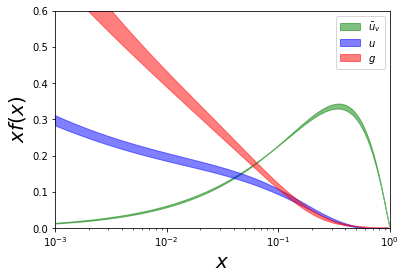

In [5]:
Q2=10
X=10**np.linspace(-3,-1)
X=np.append(X,np.linspace(0.101,0.99))
nrep=len(pdf)

u=np.array([[pdf[i].xfxQ2(2,x,Q2) for x in X] for i in range(nrep)])
ub=np.array([[pdf[i].xfxQ2(-2,x,Q2) for x in X] for i in range(nrep)])
ubv=ub-u

g=np.array([[pdf[i].xfxQ2(21,x,Q2) for x in X] for i in range(nrep)])/10

u,err_u = get_stat(u)
ubv,err_ubv = get_stat(ubv)
g,err_g = get_stat(g)

ax=py.subplot(111)
ax.fill_between(X,ubv-err_ubv,ubv+err_ubv,color='g',alpha=0.5,label=r'$\bar{u}_v$')
ax.fill_between(X,u-err_u,u+err_u,color='b',alpha=0.5,label=r'$u$')
ax.fill_between(X,g-err_g,g+err_g,color='r',alpha=0.5,label=r'$g$')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$xf(x)$',size=20)
ax.legend()

ax.semilogx()
ax.set_ylim(0,0.6)
ax.set_xlim(1e-3,1)

In [13]:
def get_stat(f):
    f=np.array(f)
    mean_f=np.einsum('i,i',weights,f)
    err_f = np.einsum('i,i',weights,(f-mean_f)**2)**0.5
    return mean_f,err_f

In [28]:
from scipy.integrate import quad 

Q2=4.0
nrep=len(pdf)

print 'valence=%0.2f+/-%0.2f'%get_stat([2*quad(lambda x: pdf[i].xfxQ2(-2,x,Q2)-pdf[i].xfxQ2(2,x,Q2),0,1)[0] for i in range(nrep)])
print 'glue=%0.2f+/-%0.2f'%get_stat([quad(lambda x: pdf[i].xfxQ2(21,x,Q2),0,1)[0] for i in range(nrep)])
print 'sea=%0.2f+/-%0.2f'%get_stat([6*quad(lambda x: pdf[i].xfxQ2(2,x,Q2),0,1)[0] for i in range(nrep)])


valence=0.49+/-0.01
glue=0.34+/-0.02
sea=0.17+/-0.01


In [30]:
Q2=4.0
nrep=len(pdf)

print 'valence=%0.3f+/-%0.3f'%get_stat([2*quad(lambda x: x*pdf[i].xfxQ2(-2,x,Q2)-x*pdf[i].xfxQ2(2,x,Q2),0,1)[0] for i in range(nrep)])
print 'glue=%0.2f+/-%0.2f'%get_stat([quad(lambda x: x*pdf[i].xfxQ2(21,x,Q2),0,1)[0] for i in range(nrep)])
print 'sea=%0.2f+/-%0.2f'%get_stat([6*quad(lambda x: x*pdf[i].xfxQ2(2,x,Q2),0,1)[0] for i in range(nrep)])


valence=0.217+/-0.004
glue=0.04+/-0.00
sea=0.02+/-0.00
